In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/klaytoncastro/idp-machinelearning/main/decision-tree/winequality-merged.csv'
df = pd.read_csv(url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [2]:
df['color'] = df['color'].replace('red', 0)
df['color'] = df['color'].replace('white', 1)
df['color'] = df['color'].astype('int')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [3]:
import numpy as np
df['worst'] = np.where(df['quality'] < 7, 1, 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,1


In [4]:
#df = df.drop(['alcohol', free sulfur dioxide', total sulfur dioxide'], axis=1) # Teste removendo várias colunas com baixa correlação

df = df.drop(['quality'], axis=1) #Removendo a coluna 'quality' para não interferir nos cálculos do modelo para predição da variável dependente 'worst'

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,worst
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [5]:
# Exibir o percentual de cada classe
print(df['worst'].value_counts(normalize=True) * 100)

worst
1    80.344775
0    19.655225
Name: proportion, dtype: float64


In [6]:
# Definindo os atributos da função de aprendizagem
y = df['worst']
X = df.drop('worst',axis = 1)

In [7]:
from sklearn.model_selection import train_test_split

# Definindo os conjuntos de treino e teste, onde x é o conjunto de atributos (features que são nossas variáveis preditoras) e y é a variável alvo.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

#Otimização dos Hiperparâmetros para o Modelo
clf = ExtraTreesClassifier(n_estimators=40, max_depth=20, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", class_weight="balanced", random_state=42)

#Treinamento e Predição
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [9]:
resultado = clf.score(x_test, y_test)
print ("Acurácia:", resultado)

Acurácia: 0.8787692307692307


In [10]:
from sklearn.metrics import confusion_matrix, classification_report

"""
Calculando e exibindo a matriz de confusão. A orientação padrão é a seguinte:
[0,0]: Verdadeiros Negativos (VN) - Previsões corretamente identificadas como negativas.
[0,1]: Falsos Positivos (FP) - Previsões incorretamente identificadas como positivas.
[1,0]: Falsos Negativos (FN) - Previsões incorretamente identificadas como negativas.
[1,1]: Verdadeiros Positivos (VP) - Previsões corretamente identificadas como positivas.
"""

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[ 208   96]
 [ 101 1220]]


In [11]:
"""
Calculando e exibindo as métricas de classificação.
Se algumas classes têm muito mais amostras do que outras, isso pode influenciar o desempenho e confiabilidade do modelo.

O "support" refere-se à quantidade de ocorrências da classe específica no conjunto de dados, sendo útil para verificar desbalanceamentos.
A "macro avg" calcula a média aritmética das métricas (precisão, recall, F1-score) para cada classe, sem considerar o número de instâncias em cada classe (support).
A "weighted avg" calcula a média ponderada das métricas para cada classe, considerando o número de instâncias em cada classe (support).
"""
print("Relatório de Classsificação:")
print(classification_report(y_test, y_pred))

Relatório de Classsificação:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       304
           1       0.93      0.92      0.93      1321

    accuracy                           0.88      1625
   macro avg       0.80      0.80      0.80      1625
weighted avg       0.88      0.88      0.88      1625



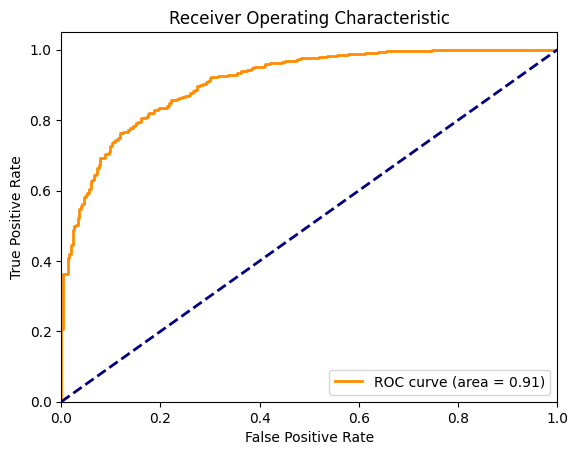

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prever as probabilidades para os dados de teste.
# Note que estamos interessados nas probabilidades da classe positiva (1), então usamos [:, 1].
y_probs = clf.predict_proba(x_test)[:, 1]

# Calcular FPR, TPR, e limiares
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
